In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import svm, datasets
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, confusion_matrix, f1_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from scipy import stats
from sklearn.preprocessing import StandardScaler

ImportError: cannot import name 'DecisionBoundaryDisplay' from 'sklearn.inspection' (C:\Users\Oussou\anaconda3\lib\site-packages\sklearn\inspection\__init__.py)

Importation de données

In [ ]:
iris = datasets.load_iris()

# Creation du dataframe
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['target'] = iris.target
df

Selection de features

In [ ]:
plt.figure(1)
sns.heatmap(df.corr(), annot= True)
plt.title('Correlation sur les données')

In [ ]:
X = np.array(df.loc[:, ["sepal length (cm)","sepal width (cm)"] ])
y = iris.target
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state =5 )
print(X[:5])

In [ ]:
#visualisation des données
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='g', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='y', label='1')
plt.scatter(X[y == 2][:, 0], X[y == 2][:, 1], color='r', label='2')
plt.xlabel("Longueur (cm)")
plt.ylabel("Largeur (cm)")
plt.title("Les 3 catégories de fleurs d'IRIS ")
plt.legend();

In [6]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [7]:
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int32
dtype: object

In [8]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [10]:
pearson_coef, p_value = stats.pearsonr(df['sepal length (cm)'], df['sepal width (cm)'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value ) 

The Pearson Correlation Coefficient is -0.11756978413300209  with a P-value of P =  0.15189826071143123


Developpement et Conception du Modèle

In [50]:
def classificationCase(C, g):
    models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=100000),
    svm.SVC(kernel="rbf", gamma=g, C=C),
    svm.SVC(kernel="poly", degree=3, gamma=g, C=C),
    )
    return models

def regressionCase(C,g):
    models = (
    svm.SVR(kernel="linear", C=C),
    svm.LinearSVR(C=C, max_iter=100000),
    svm.SVR(kernel="rbf", gamma=g, C=C),
    svm.SVR(kernel="poly", degree=3, gamma=g, C=C),
    )
    return models

In [86]:
# nous créons une instance de SVM et aménageons les données. Nous ne dimensionnons pas notre
# données puisque nous voulons tracer les vecteurs de support
# Recherche par l'agorithme de Tuning du paramètre de regularisation SVM

choice = int(input("Tapez 1 si vous voulez faire de la classification ou 2 si la regression\n"))

param_grid = {'C': [0.1, 1, 3, 10], 'gamma': [1, 0.1, 0.7, 0.01 ]}
grid = GridSearchCV(svm.SVC(),param_grid, refit=True,verbose=3)  # 
grid.fit(X_train, Y_train)
C = grid.best_estimator_.C
g = grid.best_estimator_.gamma
print(grid)

if(choice==1):
    models = classificationCase(C, g)
else:
    models = regressionCase(C, g)

# titre des graphes
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.792 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.750 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.833 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.917 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.667 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.625 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.500 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.583 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.667 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.583 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.7;, score=0.792 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.7;

In [88]:

for clf in models:
    clf.fit(X_train, Y_train)
    yhat= clf.predict(X_test)
    print(" -Implementation", clf)
    print("Valeur predite:")
    print(yhat[:])
    print("Ce qui est attendu:\n",Y_test)

    print("Les métriques", clf)
    mse = mean_squared_error(Y_test, yhat)
    score = clf.score(X_test, Y_test)
    if(choice==1):
        acc = accuracy_score(Y_test, yhat)
        print("Accuracy_score ", acc)

        print("Matice de confusion")
        matrix =confusion_matrix(Y_test, yhat)
        # plt.figure()
        disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=clf.classes_) 
        disp.plot()       
        # sns.heatmap(matrix, annot= True)

        print("classification_report")
        classification=classification_report(Y_test, yhat)
        print(classification)

    print('Le MSE (mean square error) value is: ', mse)
    print("Le score est: ", score)
    print("\n\n")

 -Implementation SVR(C=0.1, kernel='linear')
Valeur predite:
[ 1.07807583  1.34504865  1.02281821 -0.1862165   1.56876152  0.6087031
  0.27715739  0.87235948  0.34772912  0.63001605  0.77115952  1.37567687
  1.8297355   2.02613658  0.12669865  0.252528    1.43093449  2.15196593
  0.03149753  0.20658566  1.23453341  1.44624861  0.172641    1.54144973
  0.77115952  0.97355944  1.39099099  0.89698886  1.17927579  1.44624861]
Ce qui est attendu:
 [1 2 2 0 2 1 0 1 0 1 1 2 2 2 0 0 2 2 0 0 1 2 0 1 1 2 1 1 1 2]
Les métriques SVR(C=0.1, kernel='linear')
Le MSE (mean square error) value is:  0.17832284157090955
Le score est:  0.7139205750199313



 -Implementation LinearSVR(C=0.1, max_iter=100000)
Valeur predite:
[ 1.10491674  1.35254964  1.03355867 -0.07448944  1.2853099   0.79016651
  0.36201807  0.80688465  0.42077634  0.65580943  0.77332598  1.32735003
  1.65470007  1.84357469  0.13534405  0.2654604   1.39870811  1.97369103
 -0.0199719   0.3032598   1.20983349  1.38610831  0.09754465  1.5414

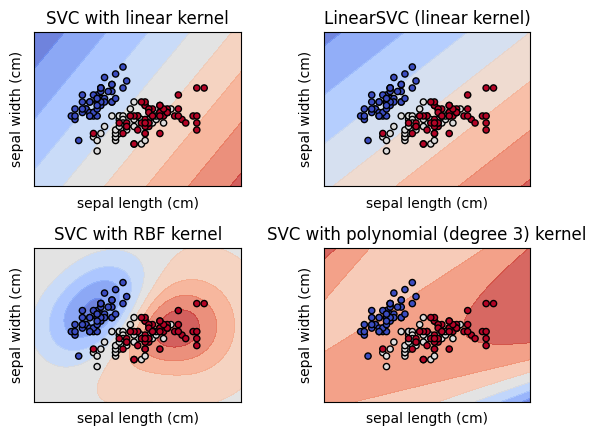

In [89]:
# Regler la grille des graphe à 2x2  
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
    )
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()